In [2]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

## References
## https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/dataset.py



In [3]:
mycwd = os.getcwd()
# print(mycwd)
os.chdir("../..")
path_datasets_filename = os.getcwd()+'/datasets/MedMNISTv2/breastmnist.npz'
print(path_datasets_filename)

/home/mxochicale/repositories/mxochicale/diffusion-models-tutorials/datasets/MedMNISTv2/breastmnist.npz


In [18]:
npz_file = np.load(path_datasets_filename)

print(type(npz_file)) #lib.npyio.NpzFile
print(npz_file.keys())#KeysView(<numpy.lib.npyio.NpzFile object at 0x7f5ac597d9f0>)

train_imgs = npz_file['train_images']
train_labels = npz_file['train_labels']
#             self.imgs = npz_file['val_images']
#             self.labels = npz_file['val_labels']
#             self.imgs = npz_file['test_images']
#             self.labels = npz_file['test_labels']

print(train_imgs.shape)#(546, 28, 28)
print(train_labels.shape)#(546, 1)
print(train_imgs.dtype) #uint8

train_imgs_float32 = train_imgs.astype(np.float32)
print(train_imgs_float32.dtype) #float32





<class 'numpy.lib.npyio.NpzFile'>
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f08d71e7730>)
(546, 28, 28)
(546, 1)
uint8
float32


In [19]:
# print(train_labels[0:400])

In [22]:
imagesTensor = torch.tensor(train_imgs)

print(type(imagesTensor))#<class 'torch.Tensor'>
print(imagesTensor.shape)
imagesTensor = torch.unsqueeze(imagesTensor, 0)
print(imagesTensor_float32.shape)
imagesTensor = torch.permute(imagesTensor, (1, 0, 2, 3))
print(imagesTensor.shape)

# number_of_output_channels = 1
# transform = transforms.Grayscale(num_output_channels=number_of_output_channels)
# imagesTensorGray = transform(imagesTensor)
# print(imagesTensorGray.shape)#torch.Size([1080, 1, 28, 28])

print(imagesTensor.dtype) #torch.uint8
imagesTensor_int64 = imagesTensor.to(torch.long)
imagesTensor_float32 = imagesTensor.to(torch.float32) 
# imagesTensorGray_float32 = torch.cuda.FloatTensor(imagesTensorGray)
#https://pytorch.org/docs/stable/tensors.html

print(imagesTensor_int64.dtype) #torch.int64
print(imagesTensor_float32.dtype) #torch.float32



print(iimagesTensor_float32.shape[0])
number_of_images = imagesTensor.shape[0]


<class 'torch.Tensor'>
torch.Size([546, 28, 28])
torch.Size([1, 546, 28, 28])
torch.Size([546, 1, 28, 28])
torch.uint8
torch.int64
torch.float32
546


In [32]:
BATCH_SIZE=3
BATCHES_SIZE=number_of_images/BATCH_SIZE
dataloader = DataLoader(imagesTensor_float32, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')


BATCHES_SIZE 182.0 or len(dataloader) 182


batch_idx: 0; sampled images in the batch: 0 of 546
    img.shape: torch.Size([3, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 92])


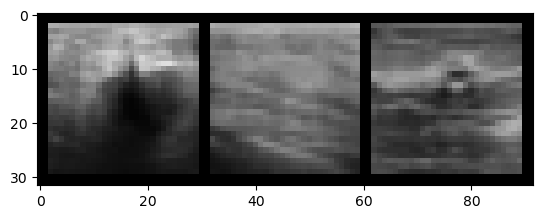

batch_idx: 50; sampled images in the batch: 150 of 546
    img.shape: torch.Size([3, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 92])


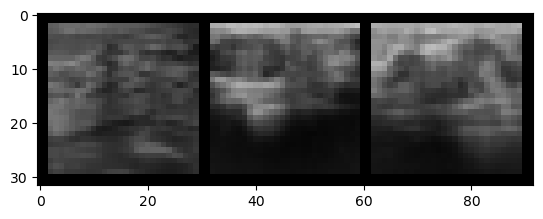

batch_idx: 100; sampled images in the batch: 300 of 546
    img.shape: torch.Size([3, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 92])


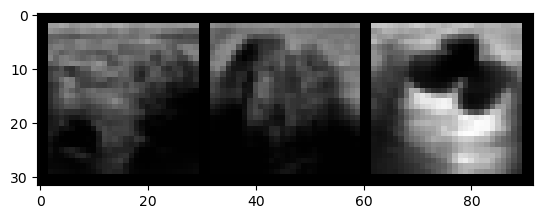

batch_idx: 150; sampled images in the batch: 450 of 546
    img.shape: torch.Size([3, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 92])


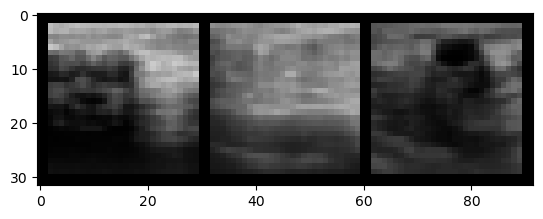

In [33]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 50 == 0:
        print(f'batch_idx: {batch_idx}; sampled images in the batch: { batch_idx*BATCH_SIZE } of {number_of_images}')
        #print(batch.shape)
        img = batch
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        print(f'    img.dtype: {img.dtype}') #torch.Size([BATCH_SIZE, 1, 64, 64])

        grid_img = torchvision.utils.make_grid(img) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        #plt.imshow(grid_img.permute(1, 2, 0)) 
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("uint8")) 

        plt.show()
    
    

In [8]:
# ls -la

In [9]:
os.chdir(mycwd)    # go back where you came from